In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Palatino"
})
%matplotlib inline


In [2]:
def newton_raphson(f, fprime, z0, max_steps, tol, **f_args):
    """
    Newton's method to find roots of C^1 functions
    :param f: The function whose root we need to find.
    :param fprime: The derivative of the `f`.
    :param z0: The initial guess for the root.
    :param max_steps: The maximum number of iterations.
    :param tol: The absolute tolerance we need for convergence.
    :param f_args: Keyword args to both `f` and `fprime`
    :return: A tuple with three members ---the last iterate,
              a boolean indicating whether we met the convergence
              criterion or not, and the number of steps taken by
              this method.
    """
    z = z0
    upd = f(z0, **f_args)
    i = 0
    while i < max_steps and abs(upd) > tol:
        deriv = fprime(z, **f_args)
        if deriv == 0:
            z -= tol  # Hard luck; move a bit as if we can improve

        upd = f(z, **f_args)/fprime(z, **f_args)
        z -= upd
        i += 1

    return (z, abs(upd) < tol, i)


In [3]:
def newton_basins1d(f,
                    fprime,
                    max_steps,
                    tol,
                    roots,
                    cmap,
                    x_bounds,
                    x_res):
    """
    Plots the basins of attraction for the Newton
    method in the 1D R->R case.
    :param f: The function whose root we need to find.
    :param fprime: The derivative of the `f`.
    :param max_steps: The maximum number of iterations.
    :param roots: An array of all roots of `f`.
    :param cmap: An array of colour names to use for basin
            corresponding to each root. Must be of the
            same length as `roots`.
    :param x_bounds: An array with lower and upper bounds for the
                range of initial root guesses.
    :param x_res: The difference between two initial root guesses.
             Lower resolution gives us a denser plot.
    :return: The figure object with the plot.
    """
    z0_root_conv = {r: [] for r in roots}
    for x in np.arange(x_bounds[0], x_bounds[1], x_res):
        (zr, converged, steps) = newton_raphson(f, fprime, x, max_steps, tol)
        if converged:
            for root_index, root in enumerate(roots):
                if (abs(root - zr) < tol):
                    z0_root_conv[root].append((x, 0))
                    break

    fig = plt.figure(figsize=(12, 3), dpi=300)
    ax = fig.add_subplot()

    for root_index, root in enumerate(roots):
        ax.scatter(*zip(*z0_root_conv[root]),
                   color=cmap[root_index], s=x_res)

    ax.set_xlabel('$z_0$', fontsize=16)
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_yticks([])
    return fig


def newton_basins(f, fprime, max_steps, tol,
                  roots, cmap,
                  x_bounds, y_bounds,
                  num_x, num_y):
    """
    Plots the basins of attraction for the Newton
    method in the 2D C->C case in cartesean.
    :param f: The function whose root we need to find.
    :param fprime: The derivative of the `f`.
    :param max_steps: The maximum number of iterations.
    :param roots: An array of all roots of `f`.
    :param cmap: An array of colour names to use for basin
            corresponding to each root. Must be of the
            same length as `roots`.
    :param x_bounds: An array with lower and upper bounds for the
                range of the real part of the 
                initial root guesses.
    :param y_bounds: An array with lower and upper bounds for the
                range of the imaginary part of the 
                initial root guesses.
    :param num_x: The number of different real part of
             initial root guesses to use. Higher number gives us
             a denser plot.
    :param num_y: The difference between the imaginary part of
             initial root guesses. Higher number  gives us
             a denser plot.
    :return: The figure object with the plot.
    """
    z0_root_conv = {r: [] for r in roots}
    for x in np.linspace(x_bounds[0], x_bounds[1], num_x):
        for y in np.linspace(y_bounds[0], y_bounds[1], num_y):
            z0 = x + y*1j
            (zr, converged, steps) = newton_raphson(
                f, fprime, z0, max_steps, tol)
            if converged:
                for root_index, root in enumerate(roots):
                    if (abs(root - zr) < tol):
                        z0_root_conv[root].append((x, y))
                        break

    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = fig.add_subplot()

    for root_index, root in enumerate(roots):
        ax.scatter(*zip(*z0_root_conv[root]),
                   color=cmap[root_index], s=0.05)

    ax.set_xlabel('$\\mathrm{Re}(z)$', fontsize=16)
    ax.set_ylabel('$\\mathrm{Im}(z)$', fontsize=16, labelpad=20, rotation=0)
    return fig


def newton_basins_polar(f, fprime, max_steps, tol,
                        roots, cmap,
                        r_bounds, theta_bounds,
                        num_r, num_theta):
    """
    Plots the basins of attraction for the Newton
    method in the 2D C->C case in polar.
    :param f: The function whose root we need to find.
    :param fprime: The derivative of the `f`.
    :param max_steps: The maximum number of iterations.
    :param roots: An array of all roots of `f`.
    :param cmap: An array of colour names to use for basin
            corresponding to each root. Must be of the
            same length as `roots`.
    :param r_bounds: An array with lower and upper bounds for the
                range of the amplitude of the 
                initial root guesses.
    :param theta_bounds: An array with lower and upper bounds for the
                    range of the angles of the 
                    initial root guesses.
    :param r_res: The number of different amplitudes of
             initial root guesses to use. Higher number gives us
             a denser plot.
    :param num_theta: The number of different angles of
                 initial root guesses. Higher number gives us
                 a denser plot.
    :return: The figure object with the plot.
    """
    z0_root_conv = {r: [] for r in roots}
    for r in np.linspace(r_bounds[0], r_bounds[1], num_r):
        for theta in np.linspace(theta_bounds[0], theta_bounds[1], num_theta):
            z0 = r*np.exp(theta*1j)
            (zr, converged, steps) = newton_raphson(
                f, fprime, z0, max_steps, tol)
            if converged:
                for root_index, root in enumerate(roots):
                    if (abs(root - zr) < tol):
                        z0_root_conv[root].append((theta, r))
                        break

    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = fig.add_subplot(projection='polar')
    for root_index, root in enumerate(roots):
        ax.scatter(*zip(*z0_root_conv[root]),
                   color=cmap[root_index],
                   s=0.05)

    r_labels = ax.get_ymajorticklabels()
    for label in r_labels:
        label.set_color('white')
    return fig


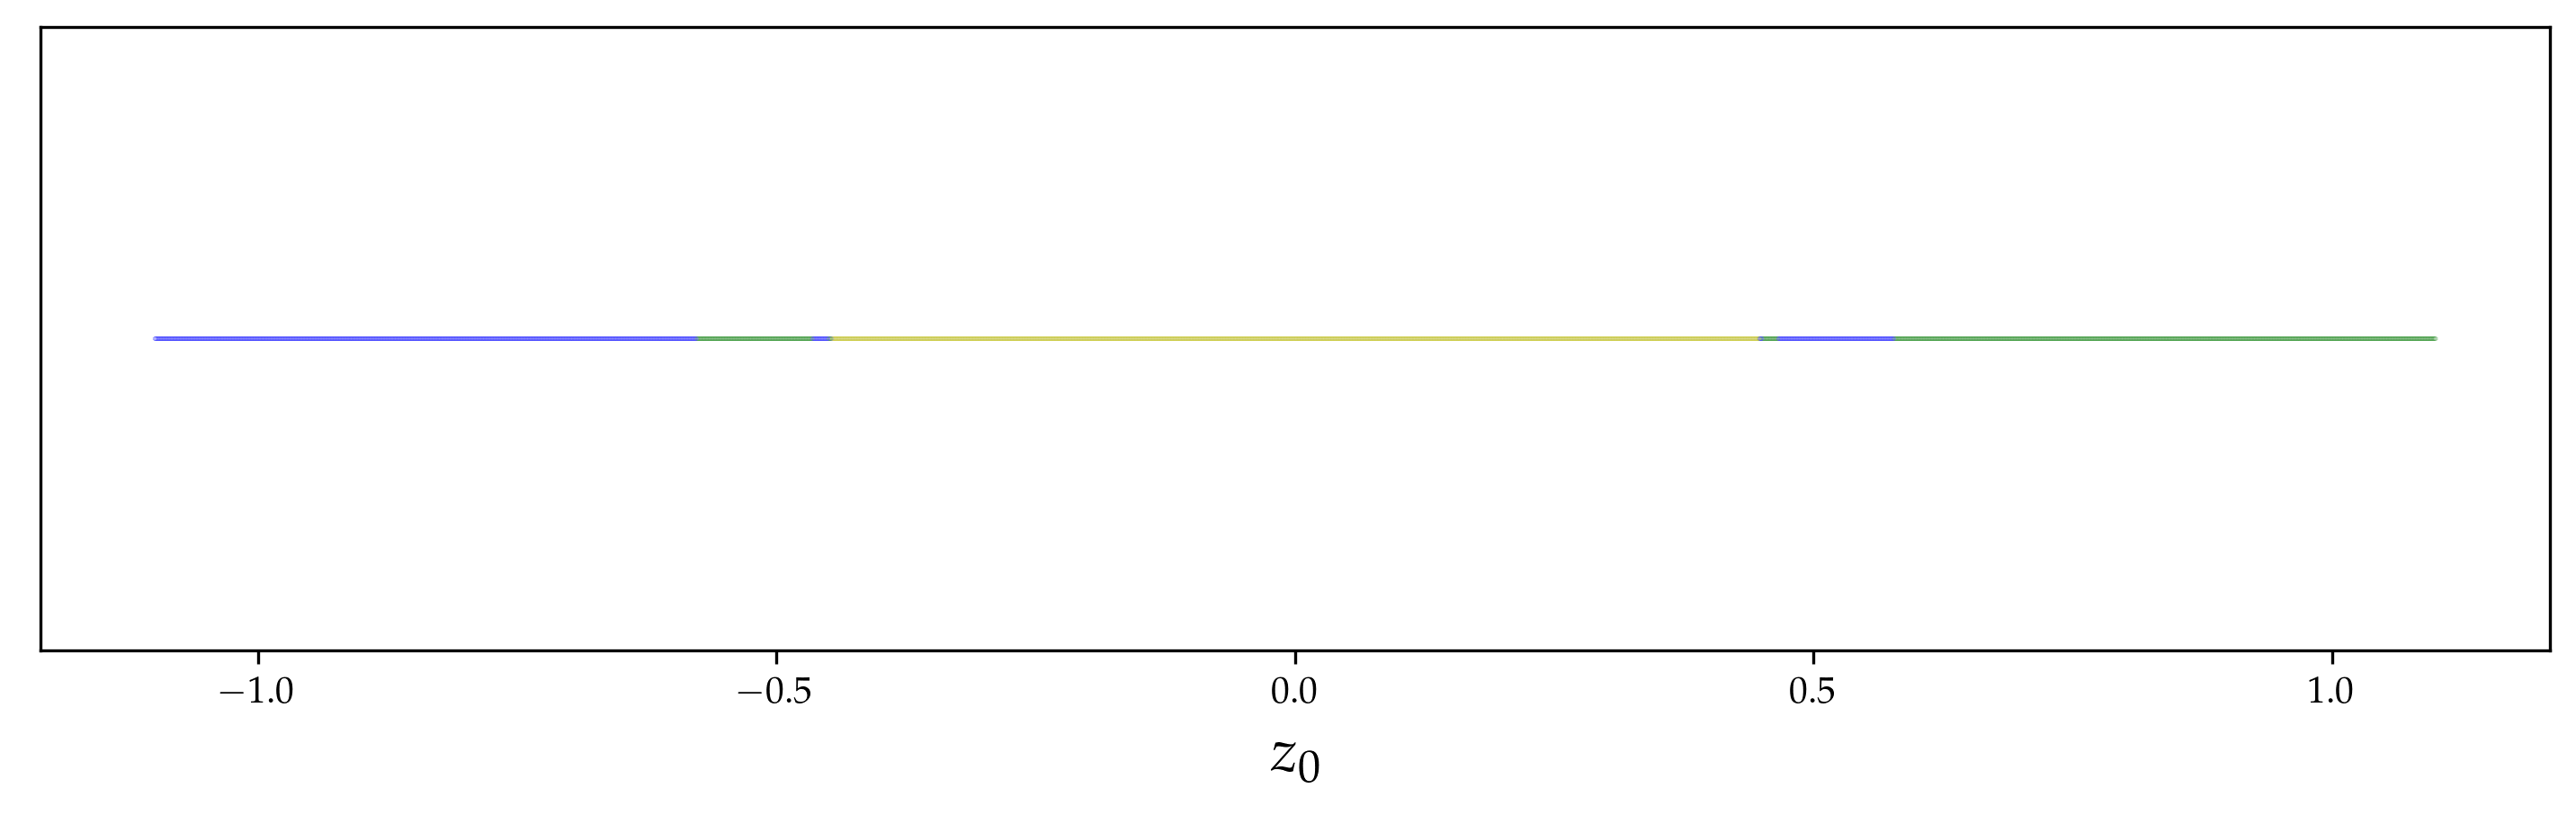

In [4]:
def f(x): return x**3 - x
def fprime(x): return 3*x**2 - 1


max_steps = 10000
tol = 0.001
roots = [0, 1, -1]
cmap = ['y', 'g', 'b']
fig = newton_basins1d(f, fprime, max_steps, tol,
                      roots, cmap,
                      x_bounds=[-1.1, 1.1], x_res=0.0001)
fig.savefig('cubic1d_fractal.png', format="png", bbox_inches='tight')


In [5]:
# This finds the 1-D fractal boundaries
alpha = 3  # Vary this and see magic!

# This is the cubic


def f(x, **f_args):
    b = f_args['b']
    return 2*x**3 + 3*b*x**2 - b*alpha

# This is the derivative of the cubic


def f_prime(x, **f_args):
    b = f_args['b']
    return 6*x**2 + 6*b*x


# Store basin boundaries
b_vals = np.zeros(10)
b_vals[0] = np.sqrt(alpha/3)
for i in range(len(b_vals) - 1):
    b_vals[i+1], _, _ = newton_raphson(f, f_prime,
                                       b_vals[i], 100, tol=1e-7, b=b_vals[i])

# Compute the shrink factor and output to LaTeX
for i in range(len(b_vals) - 2):
    gamma = (b_vals[i+1] - b_vals[i])/(b_vals[i + 2] - b_vals[i + 1])
    print(
        f'{i} & ${round(b_vals[i], 6)} \dots$ & ${round(gamma, 4)} \dots$ \\\\')

print('$\\vdots$ & $\\vdots$ & $\\vdots$ \\\\')
print(f'$\infty$ & ${round(np.sqrt(alpha/5), 6)} \dots$ & N/A \\\\')


0 & $1.0 \dots$ & $7.2569 \dots$ \\
1 & $0.806444 \dots$ & $6.1795 \dots$ \\
2 & $0.779772 \dots$ & $6.0292 \dots$ \\
3 & $0.775456 \dots$ & $6.0049 \dots$ \\
4 & $0.77474 \dots$ & $6.0008 \dots$ \\
5 & $0.774621 \dots$ & $6.0001 \dots$ \\
6 & $0.774601 \dots$ & $6.0 \dots$ \\
7 & $0.774597 \dots$ & $6.0 \dots$ \\
$\vdots$ & $\vdots$ & $\vdots$ \\
$\infty$ & $0.774597 \dots$ & N/A \\


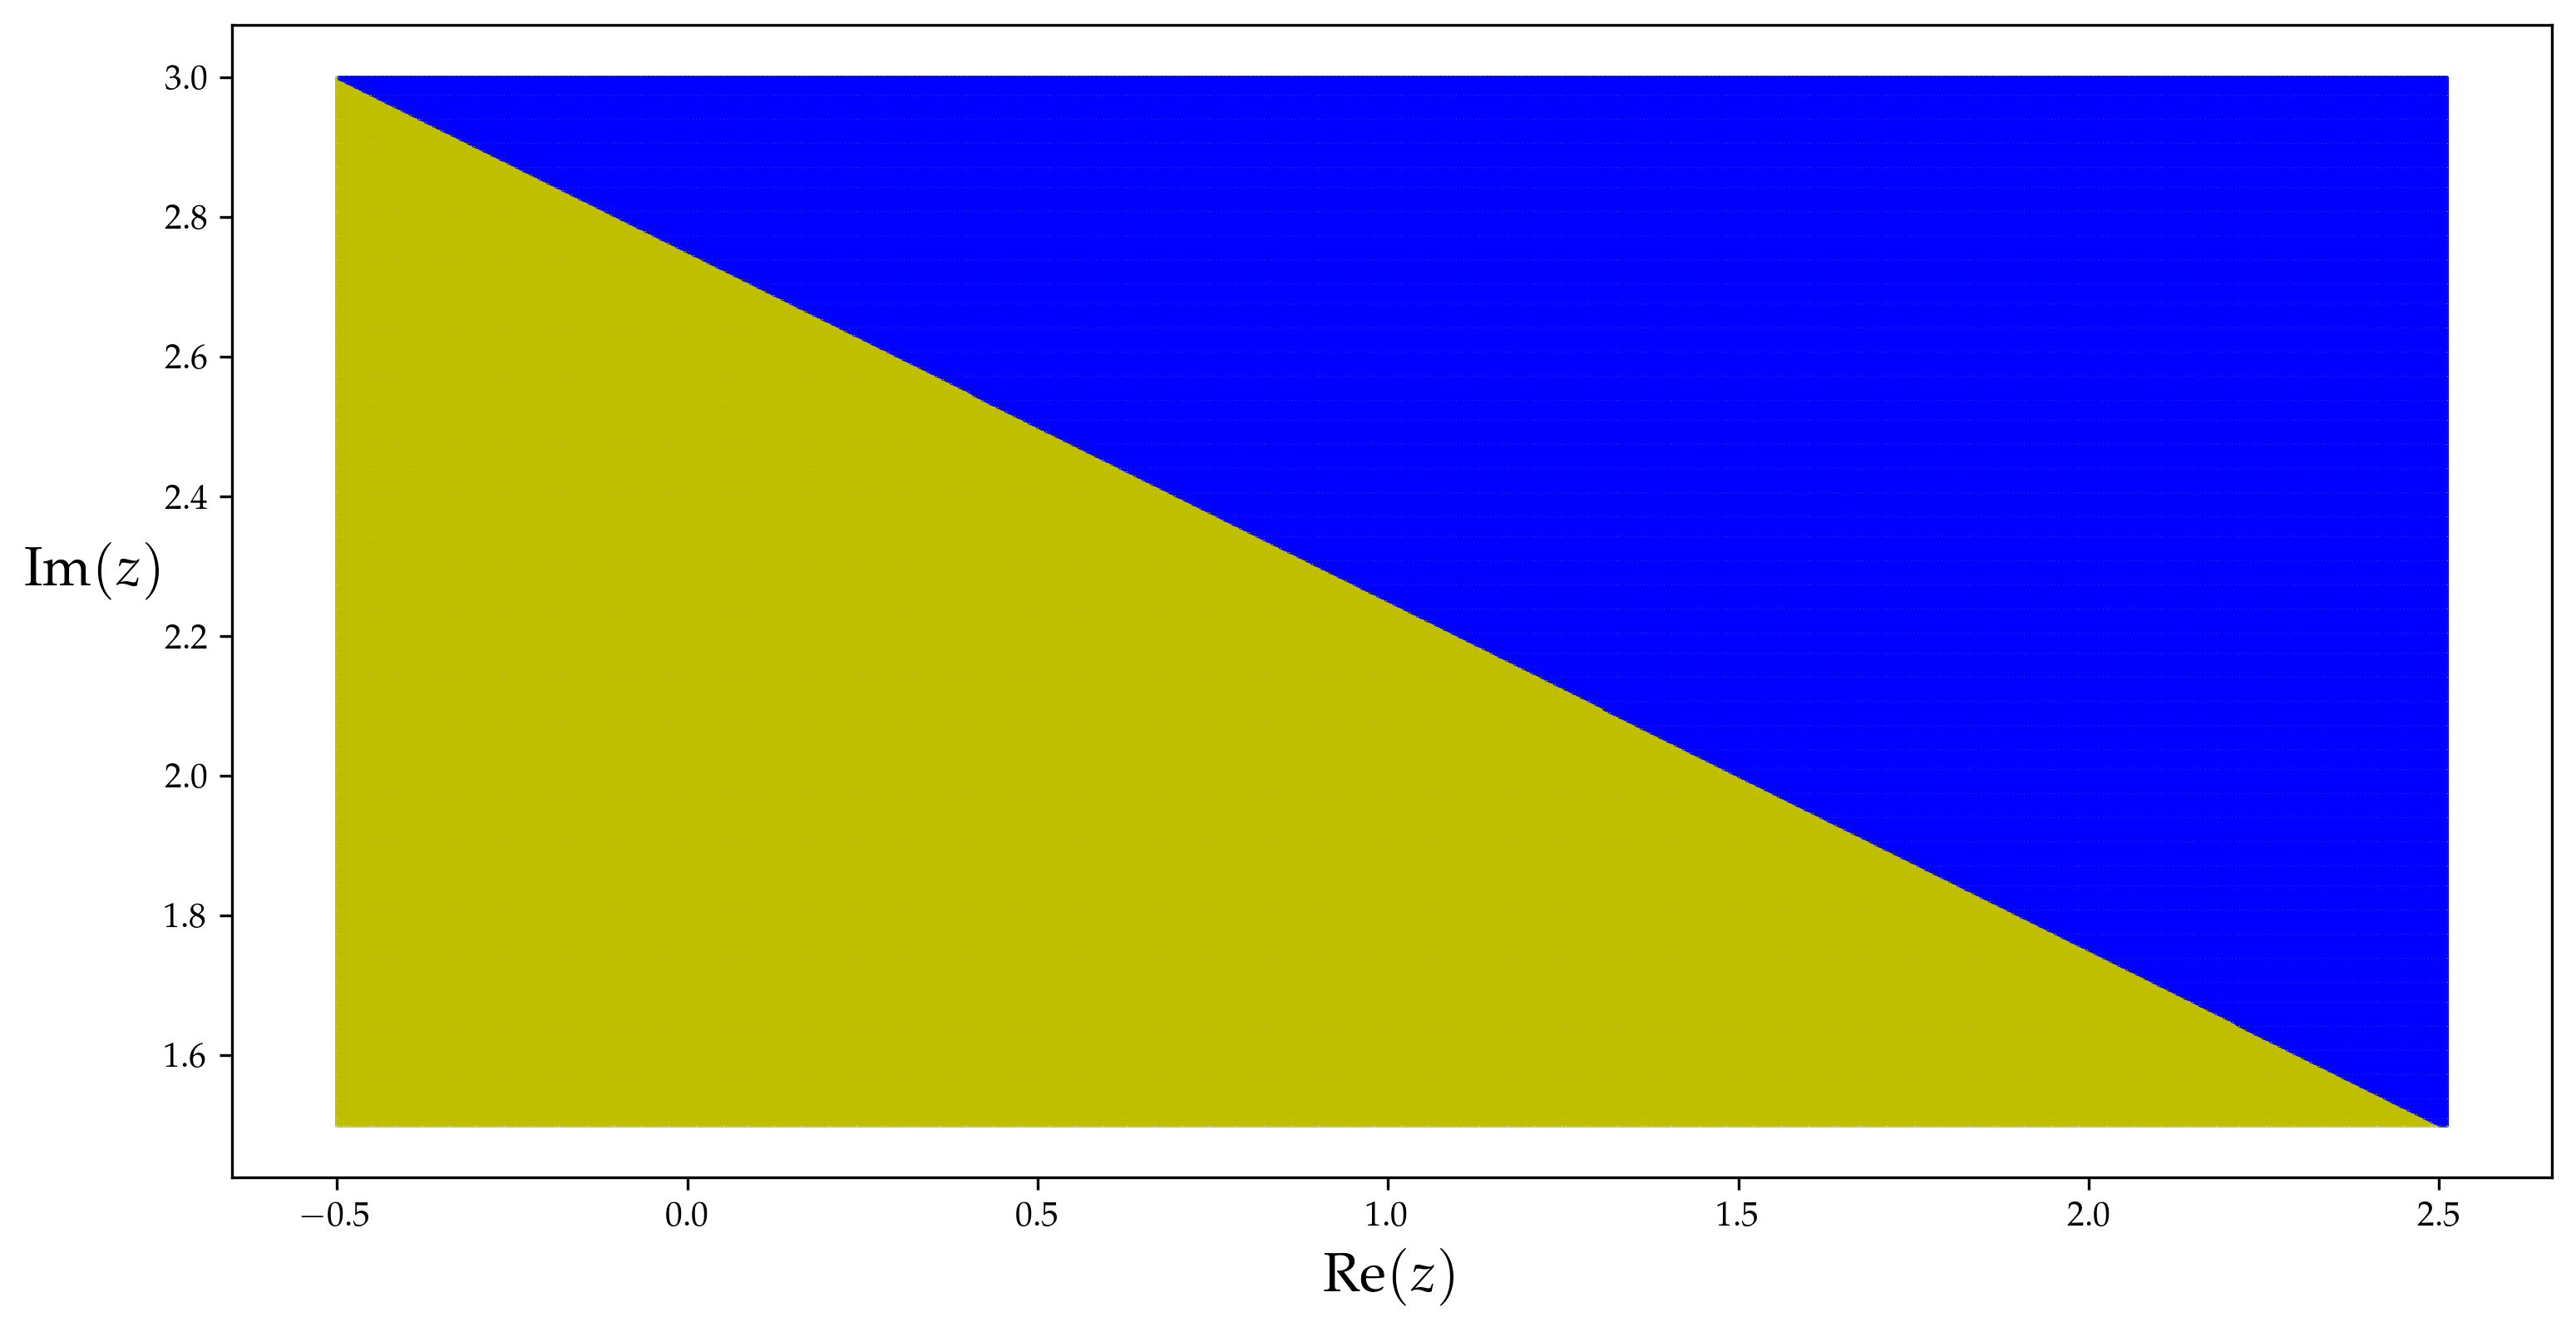

In [6]:
roots = [1 + 1j, 2 + 3j]
def f(x): return (x - roots[0])*(x - roots[1])
def fprime(x): return 2*x - (roots[0] + roots[1])


max_steps = 100
tol = 0.01
cmap = ['y', 'b']
fig = newton_basins(f, fprime, max_steps, tol,
                    roots, cmap,
                    x_bounds=[-0.5, 2.51],
                    y_bounds=[1.5, 3],
                    num_x=1000, num_y=1000)
fig.savefig('quadratic_fractal.png', format="png", bbox_inches='tight')


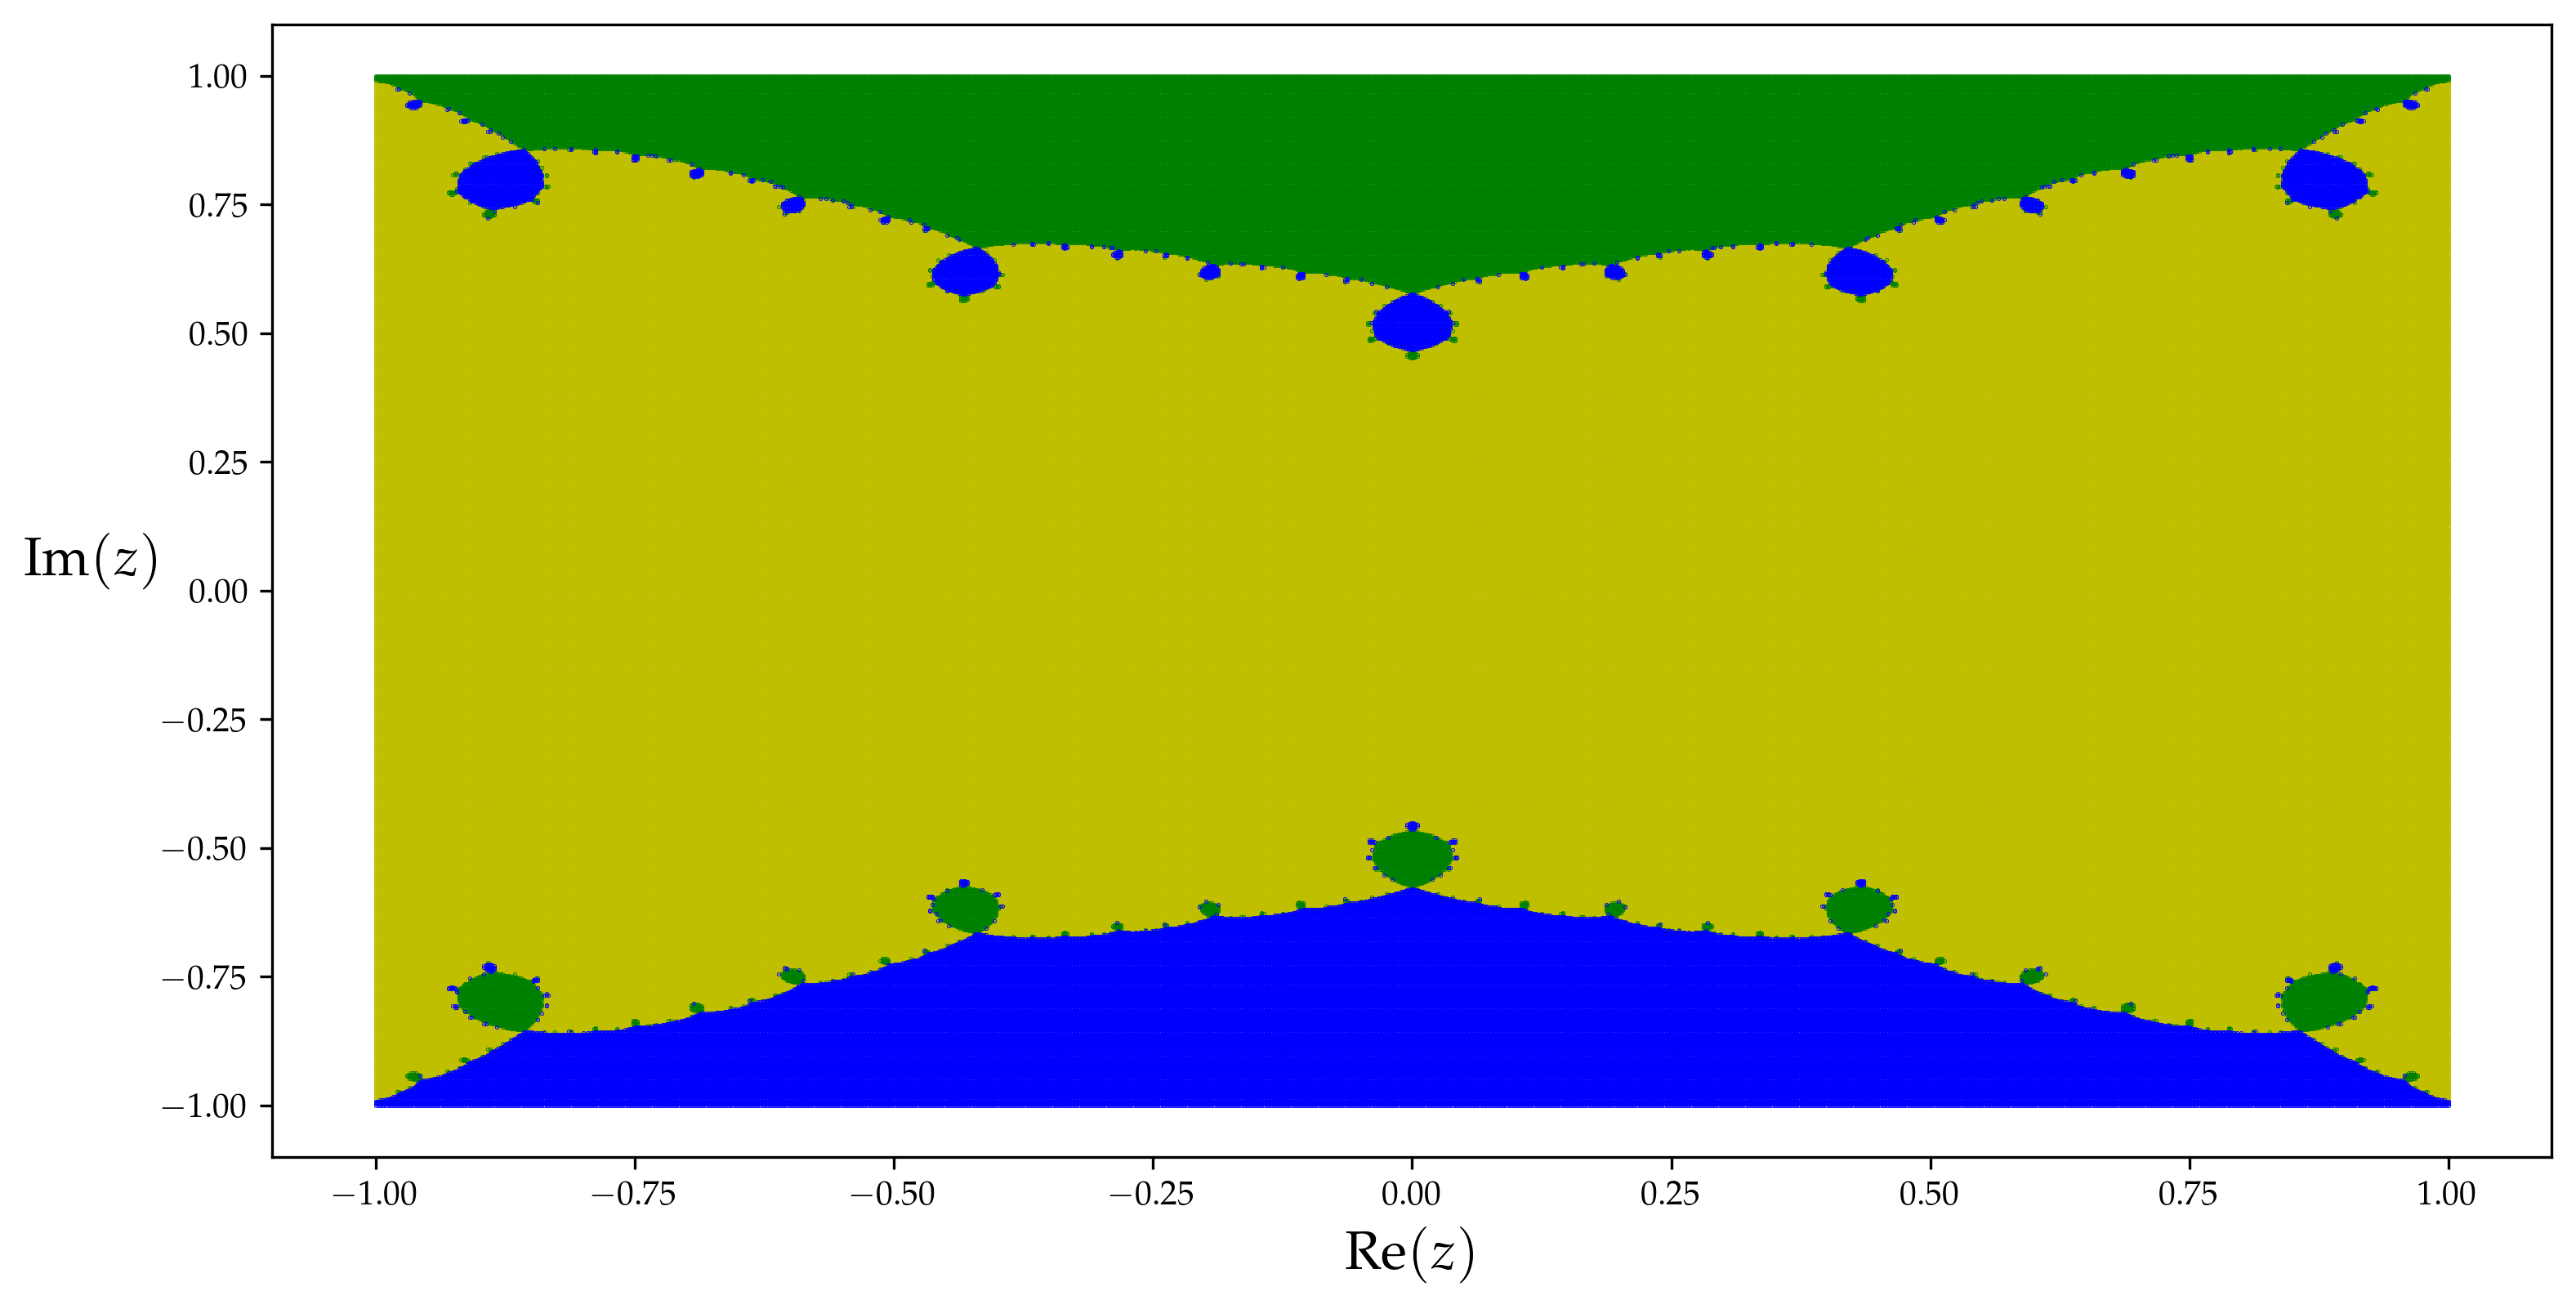

In [7]:
def f(x): return x**3 + x
def fprime(x): return 3*x**2 + 1


max_steps = 100
tol = 0.01
roots = [0, 1j, -1j]
cmap = ['y', 'g', 'b']
fig = newton_basins(f, fprime, max_steps, tol,
                    roots, cmap,
                    x_bounds=[-1, 1],
                    y_bounds=[-1, 1],
                    num_x=1000, num_y=1000)
fig.savefig('cubic_fractal.png', format="png", bbox_inches='tight')


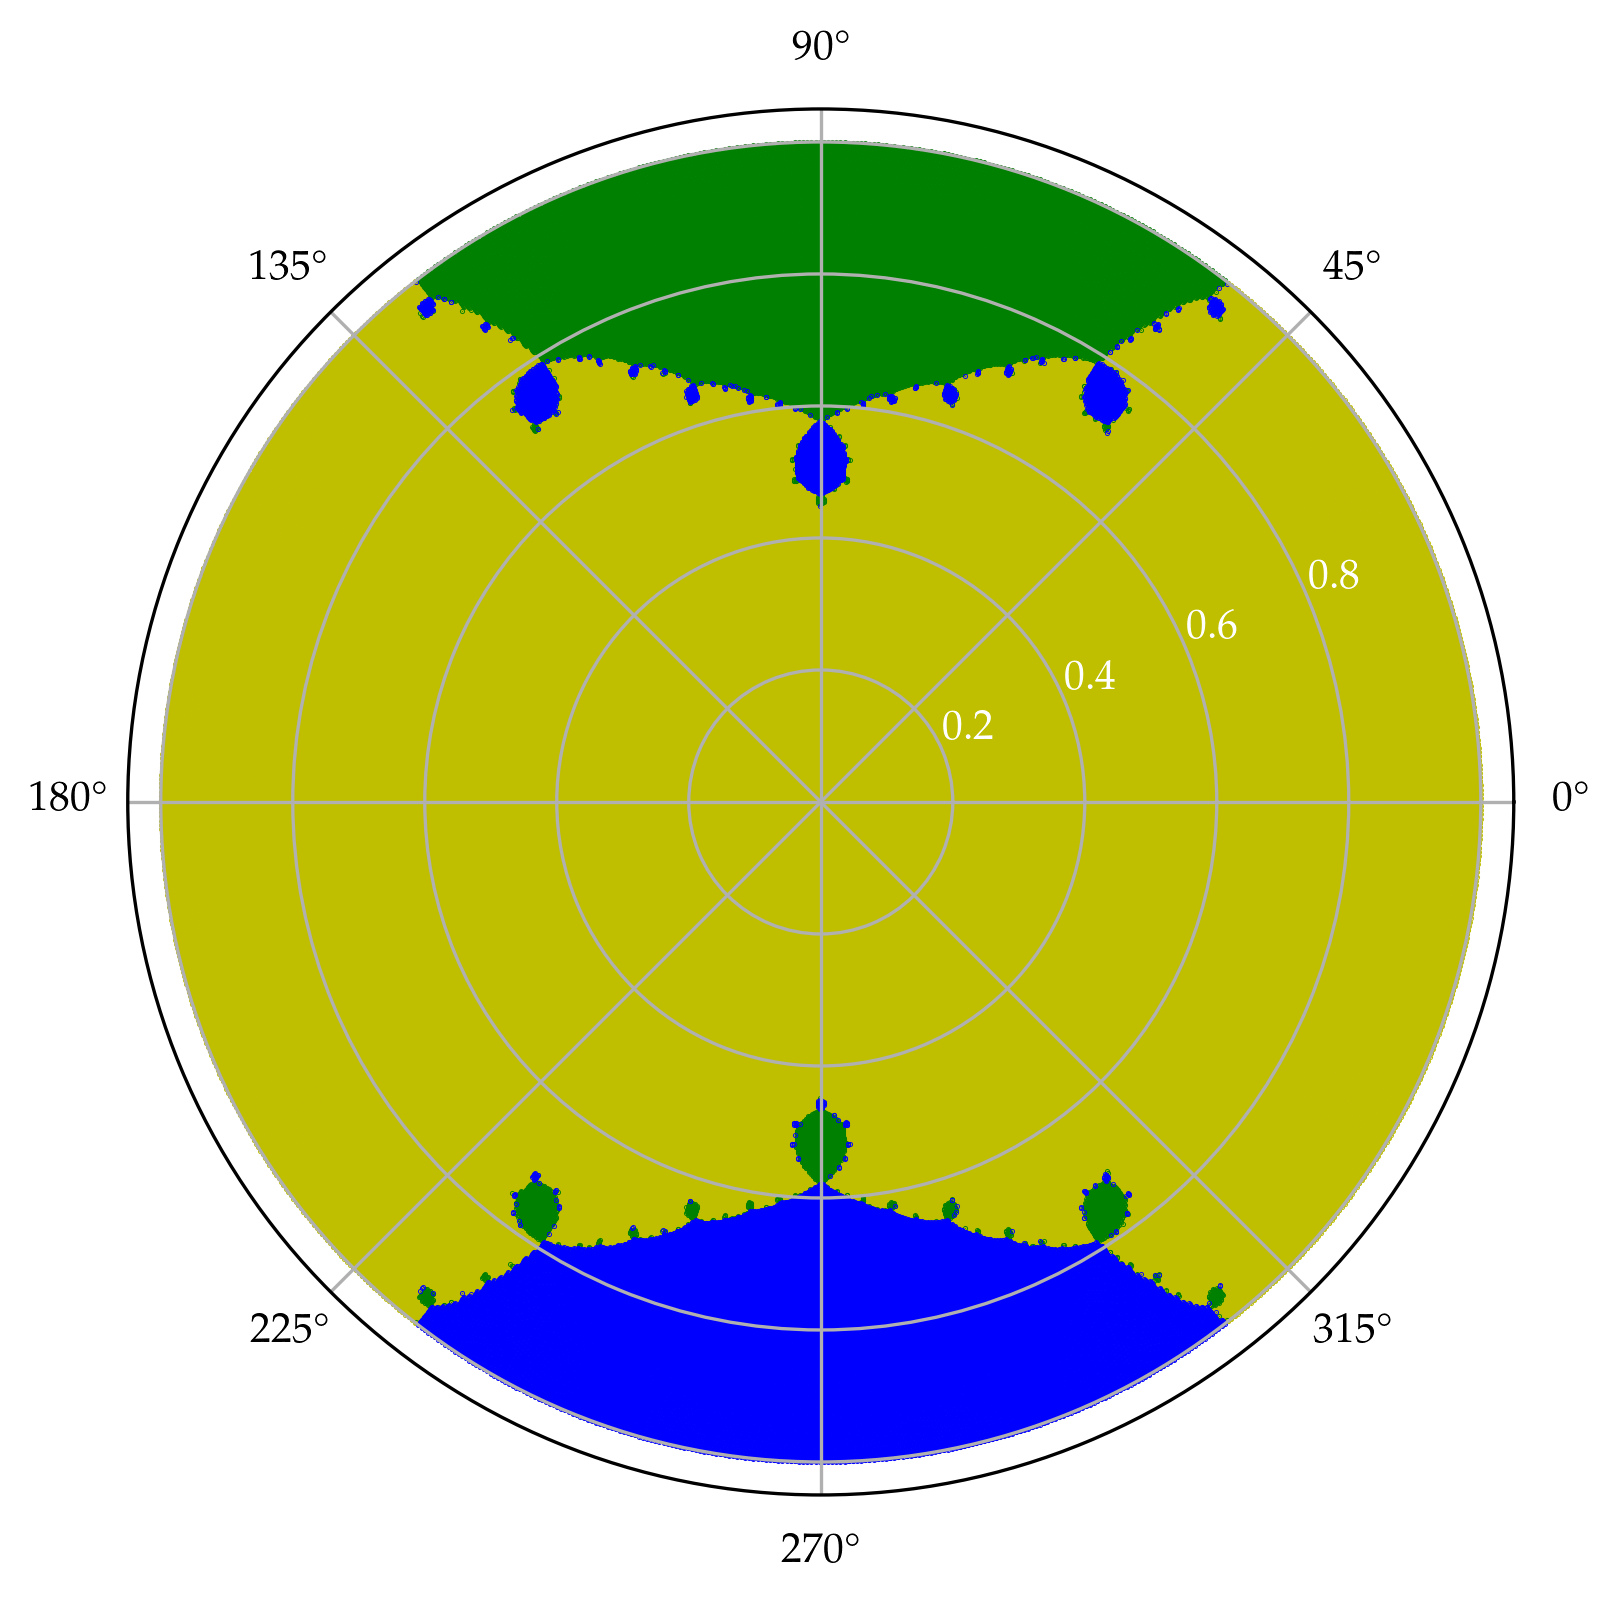

In [8]:
roots = [0, 1j, -1j]
def f(x): return x**3 + x
def fprime(x): return 3*x**2 + 1


max_steps = 100
tol = 0.01
cmap = ['y', 'g', 'b']
fig = newton_basins_polar(f, fprime, max_steps, tol,
                          roots, cmap,
                          r_bounds=[0, 1],
                          theta_bounds=[0, 2*np.pi],
                          num_r=1000,
                          num_theta=1000)
fig.savefig('cubic_fractal_polar.png', format="png", bbox_inches='tight')


In [13]:
def basin_unity_roots(order, cmap=['m', 'r', 'g', 'y', 'b']):
    """
    Plots the basins of attractions for all roots of unity.
    :param order: The order of root that we need.
    :param cmap: The colours to use for each root.
                 This must be an array at least as large
                 as the order of roots we want. By default
                 we use `['m', 'r', 'g', 'y', 'b']` in that
                 order.
    :return: The figure object.
    """
    roots = [np.cos(2*np.pi*k/order) + np.sin(2*np.pi*k/order)
             * 1j for k in range(order)]

    def f(x): return x**order - 1
    def fprime(x): return order*x**(order - 1)
    max_steps = 100
    tol = 0.01
    return newton_basins_polar(f, fprime, max_steps, tol,
                               roots, cmap,
                               r_bounds=[0, 1],
                               theta_bounds=[0, 2*np.pi],
                               num_r=1000,
                               num_theta=1000)


In [ ]:
fig = basin_unity_roots(3)
fig.savefig('third_root_fractal.png', format="png", bbox_inches='tight')


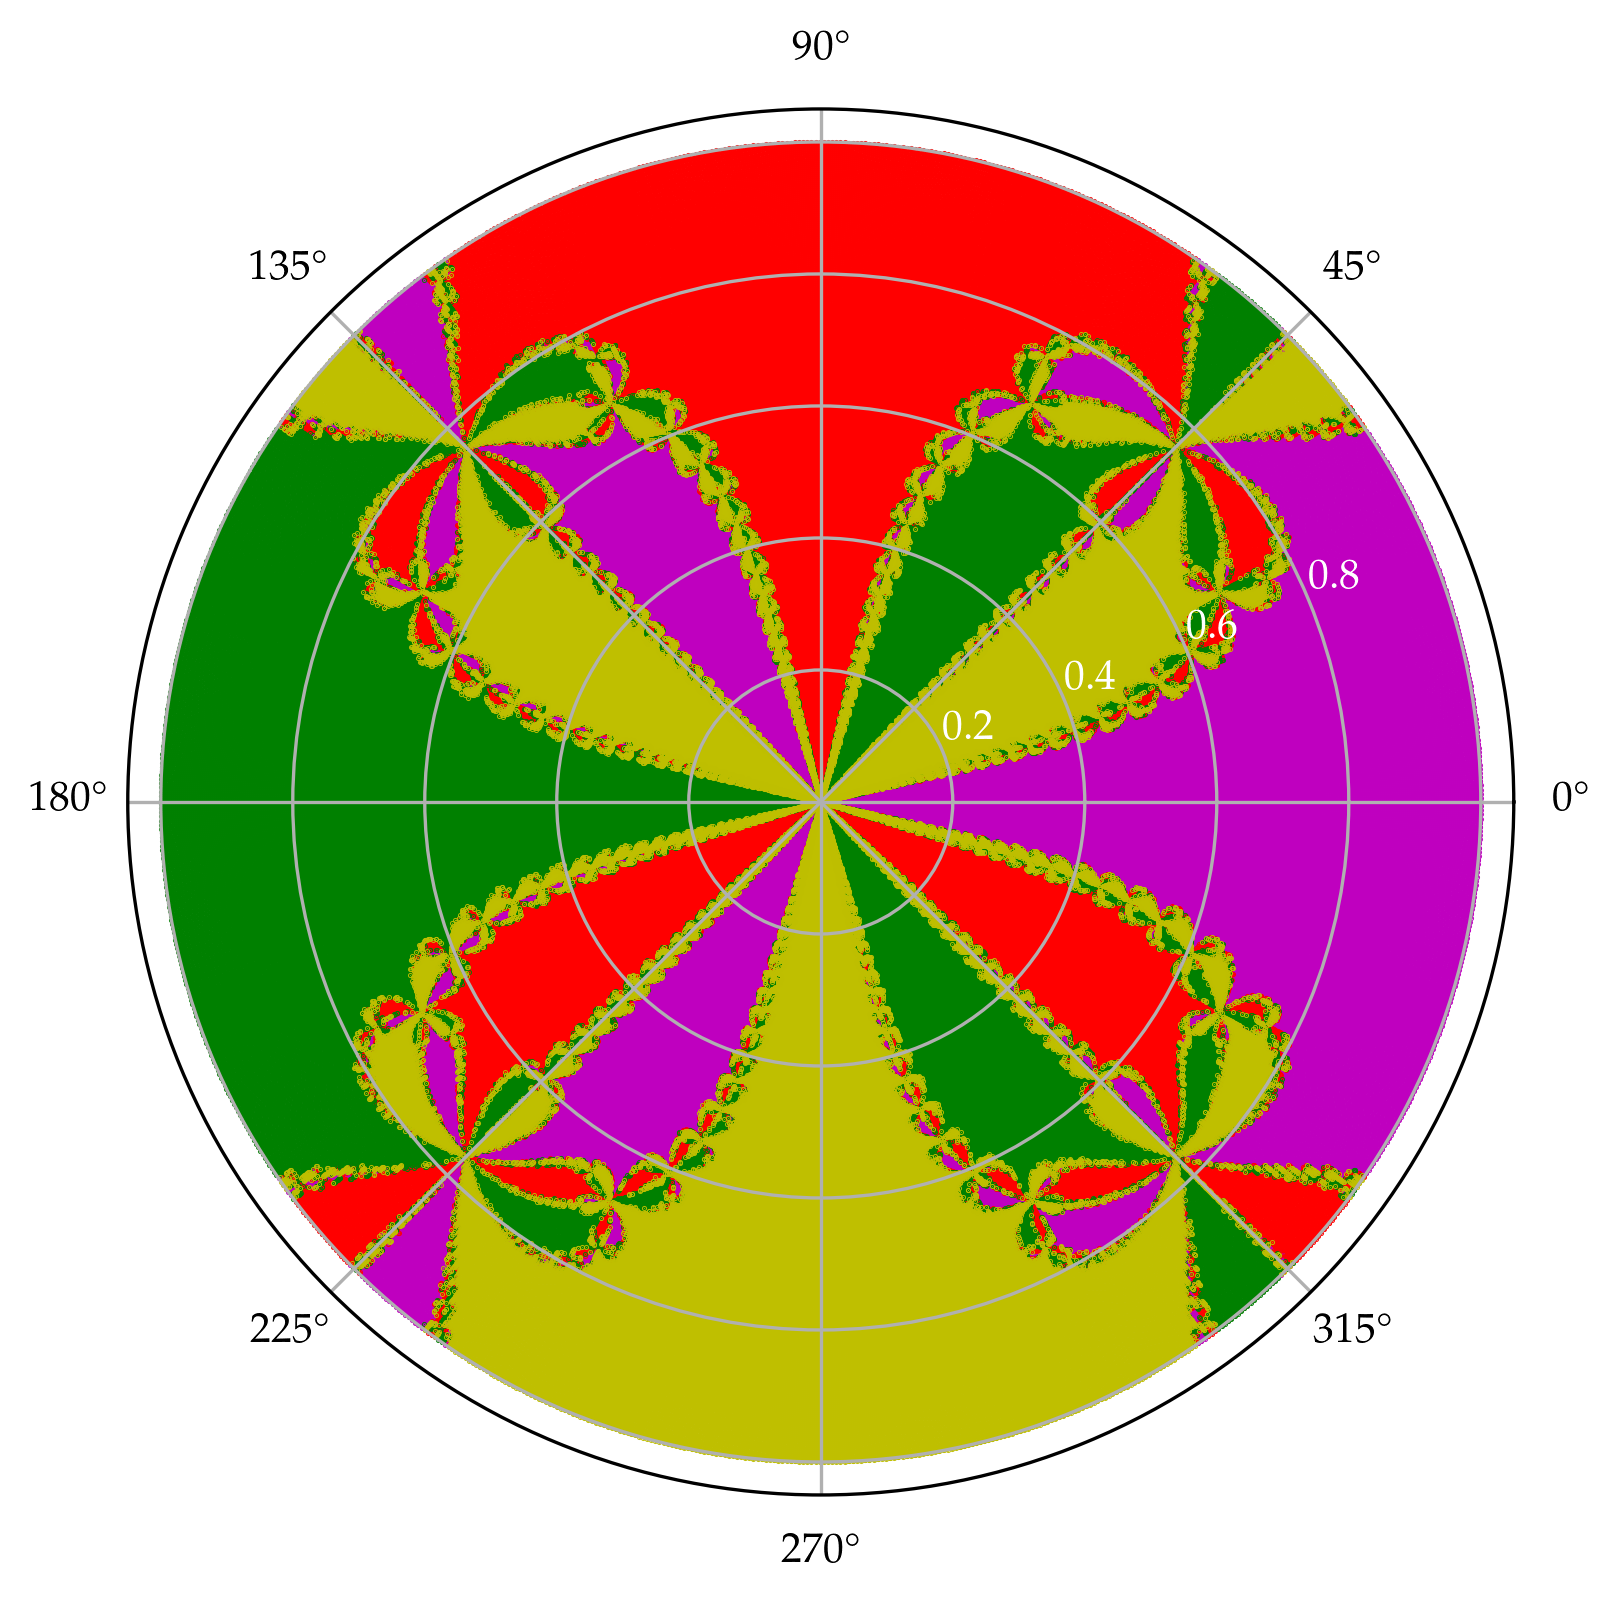

In [11]:
fig = basin_unity_roots(4)
fig.savefig('fourth_root_fractal.png', format="png", bbox_inches='tight')


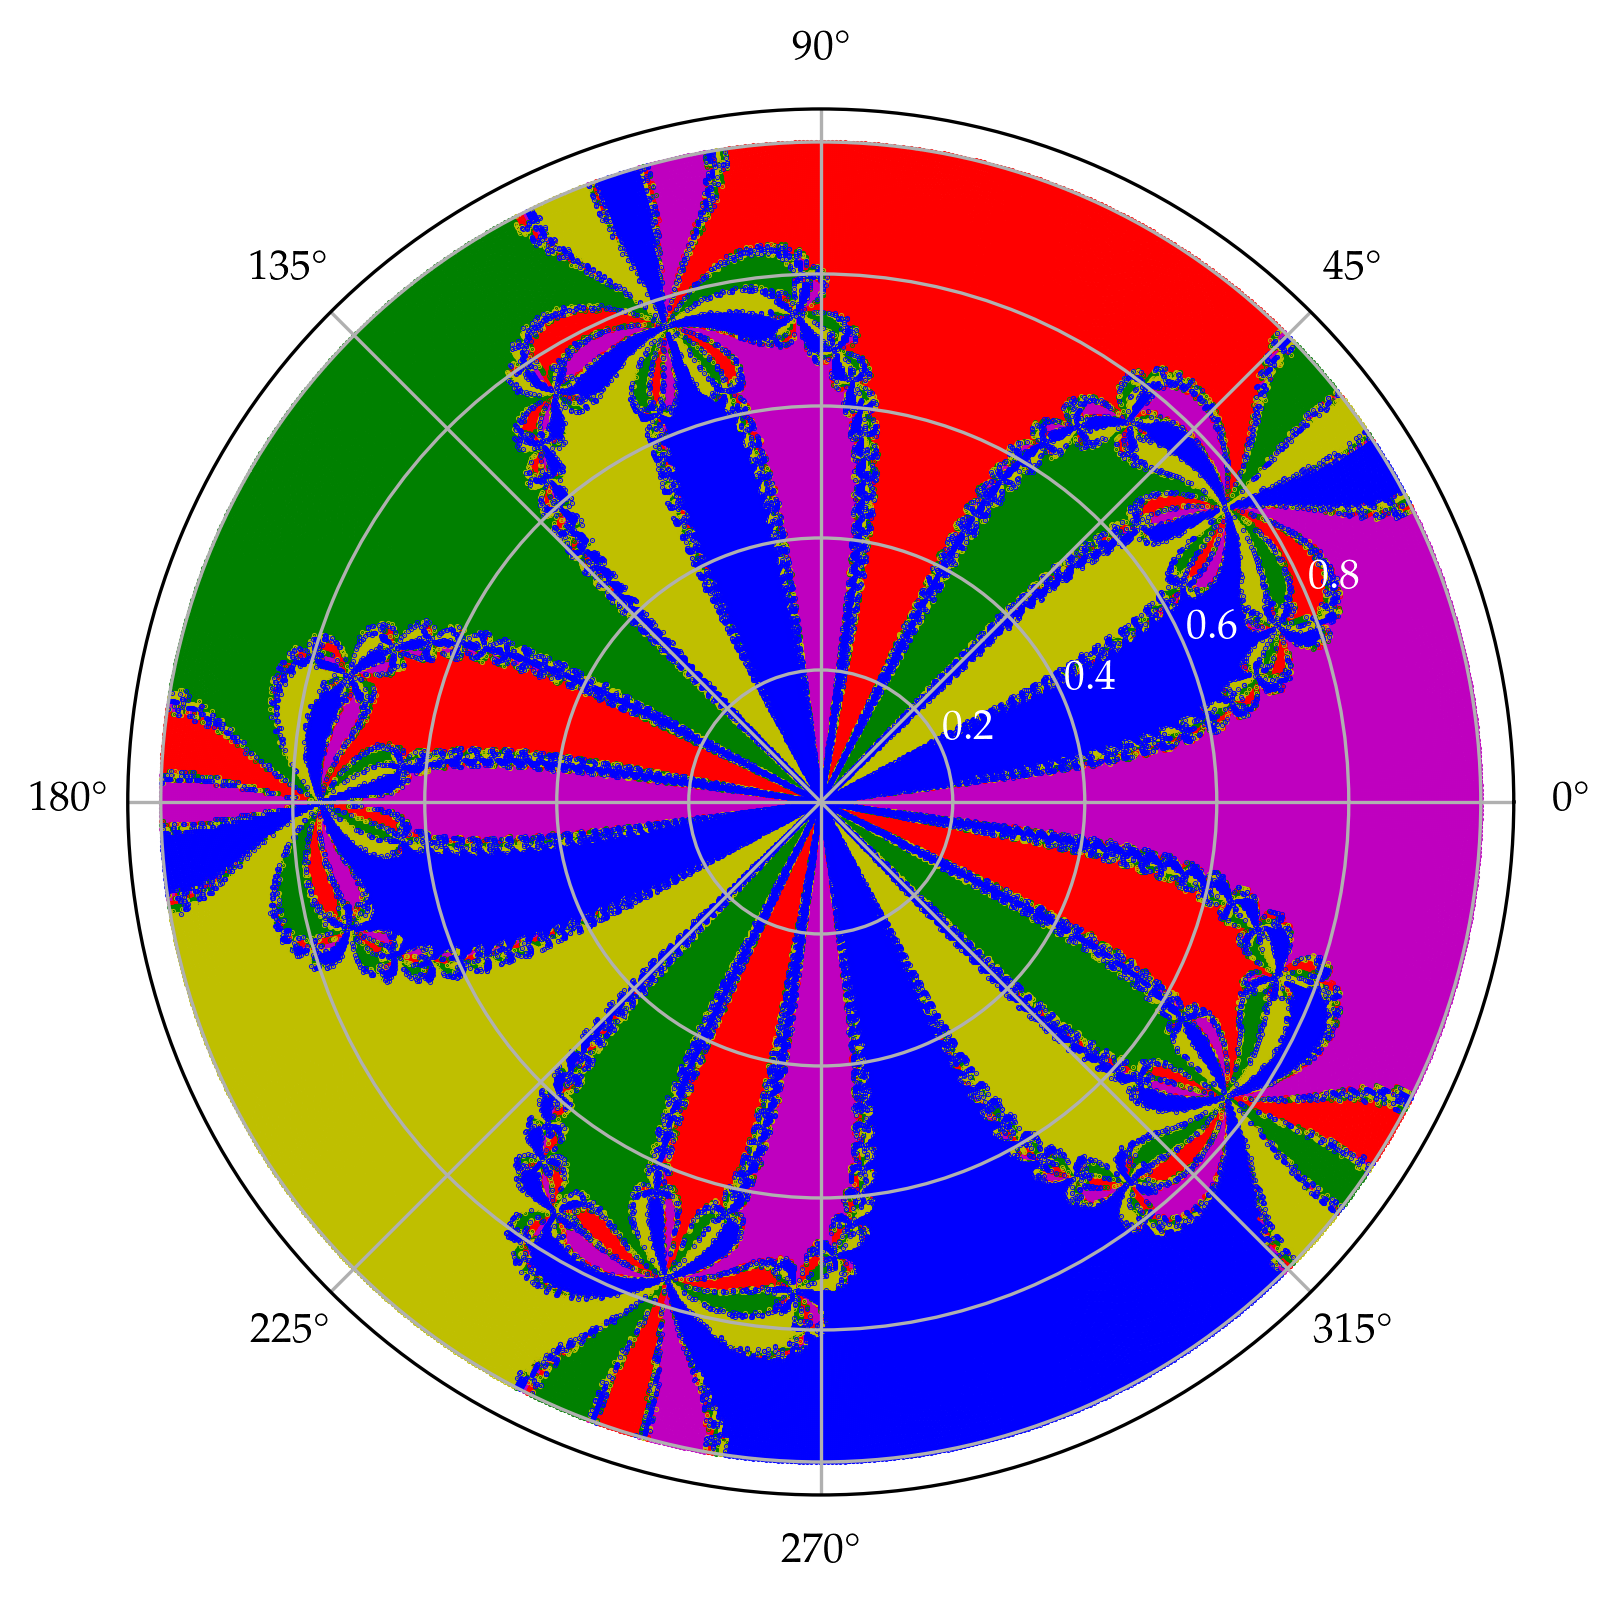

In [12]:
fig = basin_unity_roots(5)
fig.savefig('fifth_root_fractal.png', format="png", bbox_inches='tight')
